In [28]:
import numpy as np
import matplotlib.pylab as plt
def graph(name):
    # Determinar dimensiones de la malla
    data = np.loadtxt(f"data/{name}", skiprows=3)
    X = data[:,2]
    Y = data[:,3]
    U = data[:,4]#.reshape(5,5)
    V = data[:,5]#.reshape(5,5)
    P = data[:,6]#.reshape(5,5)
    XY = np.meshgrid(X,Y)


    nx = len(np.unique(X))
    ny = len(np.unique(Y))

    # Redimensionar arrays
    X_grid = X.reshape(ny, nx)
    Y_grid = Y.reshape(ny, nx)
    U_grid = U.reshape(ny, nx)
    V_grid = V.reshape(ny, nx)
    P_grid = P.reshape(ny, nx)

    # Crear figura combinada
    plt.figure(figsize=(8, 6))

    # Mapa de contorno de presión
    contour = plt.contourf(X_grid, Y_grid, P_grid, cmap='viridis')
    plt.colorbar(contour, label='Presión P')

    # Superponer campo vectorial de velocidades
    plt.quiver(X_grid, Y_grid, U_grid*5, V_grid*5, color='black', scale=10)

    # Etiquetas y formato
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Presión y Campo de Velocidades')
    plt.axis('equal')
    plt.tight_layout()
    plt.grid(True)
    plt.savefig(f"images/{name}.png")
    plt.show()

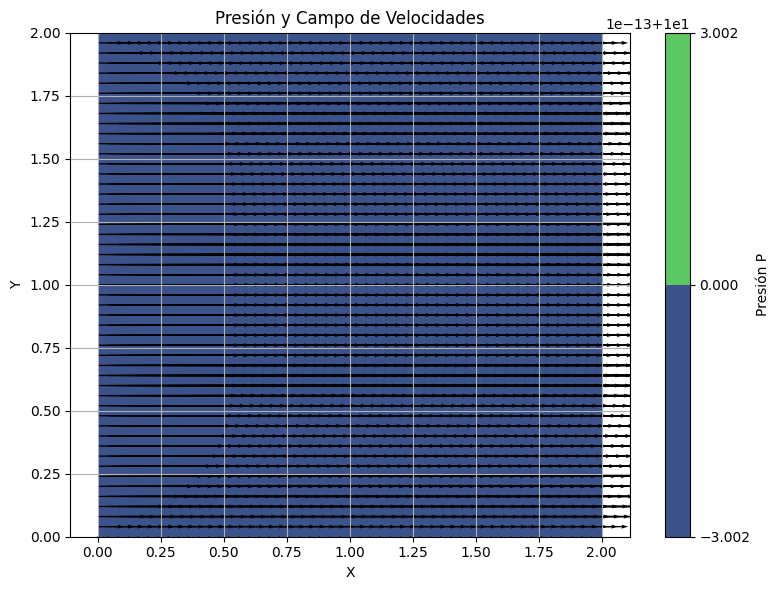

In [25]:
graph("campos_510.txt")

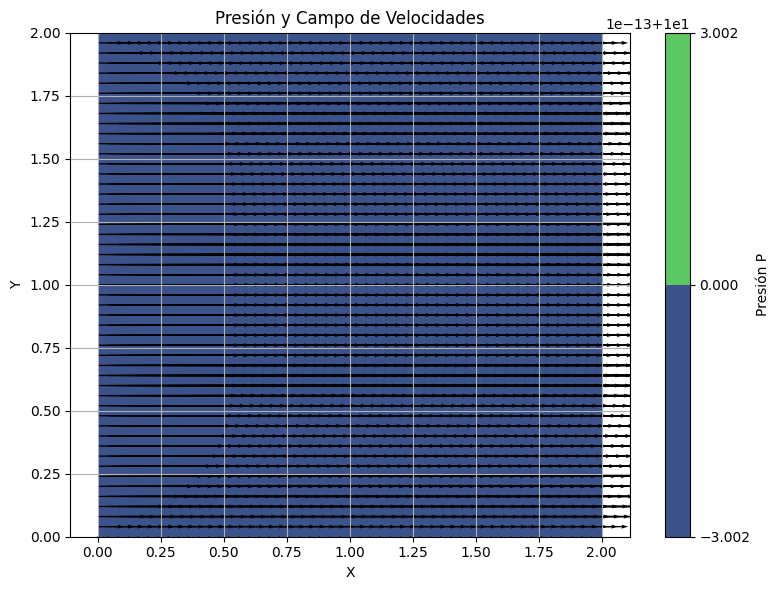

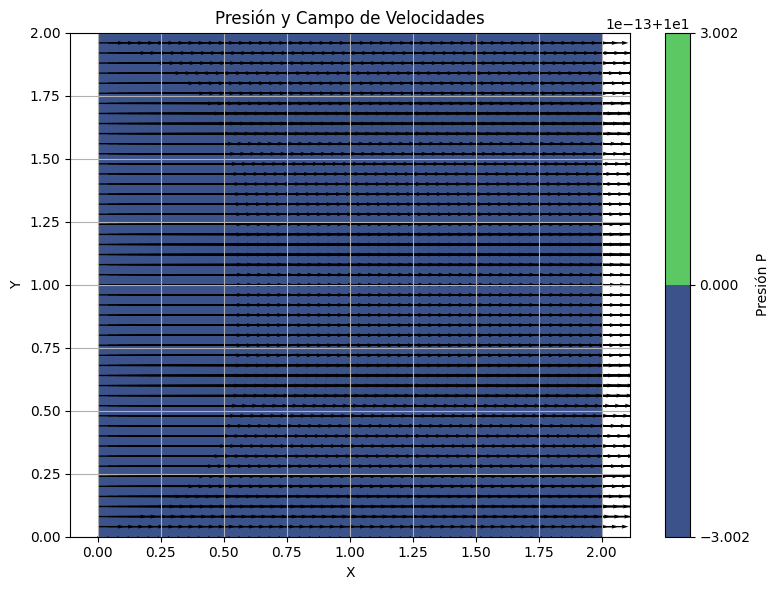

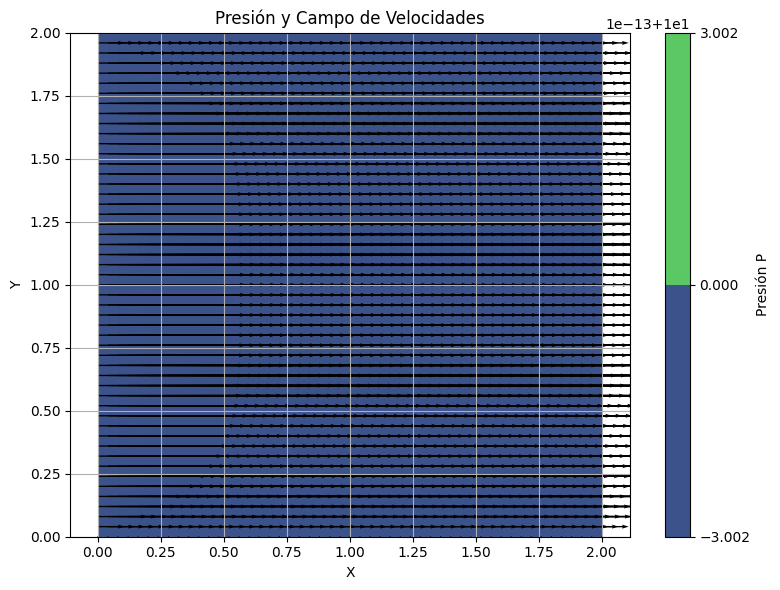

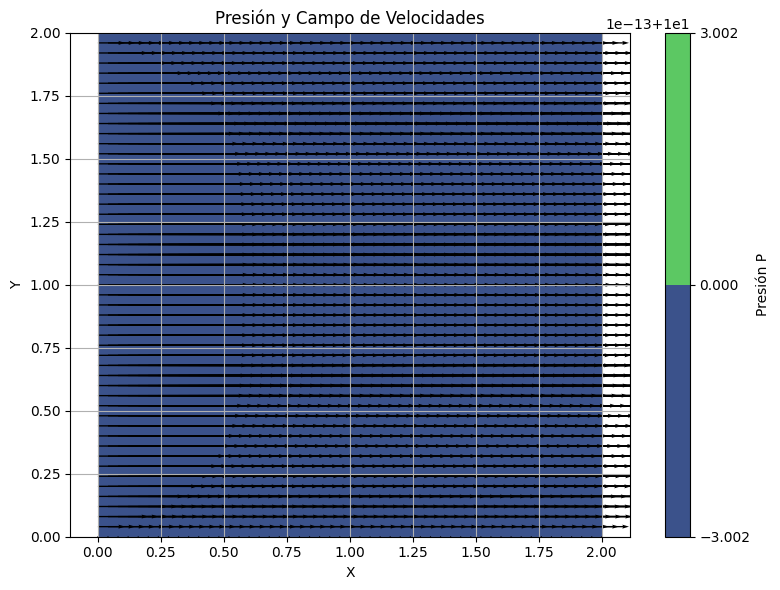

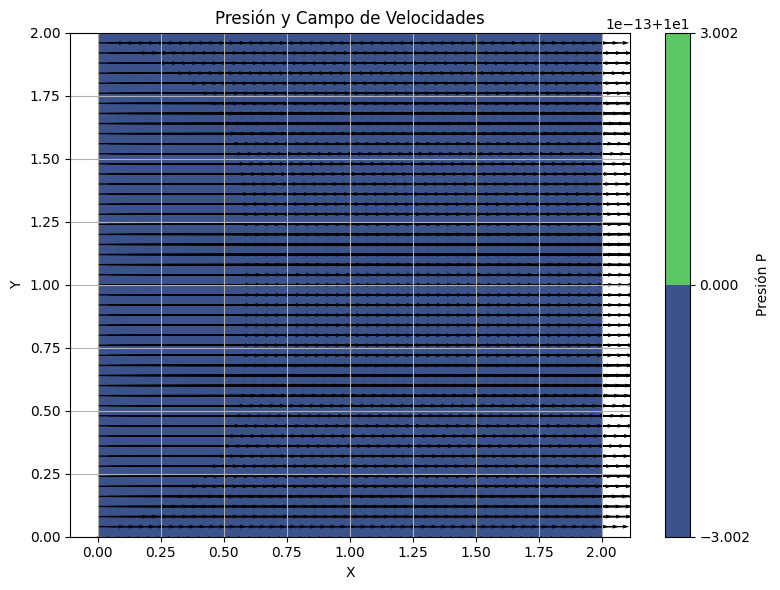

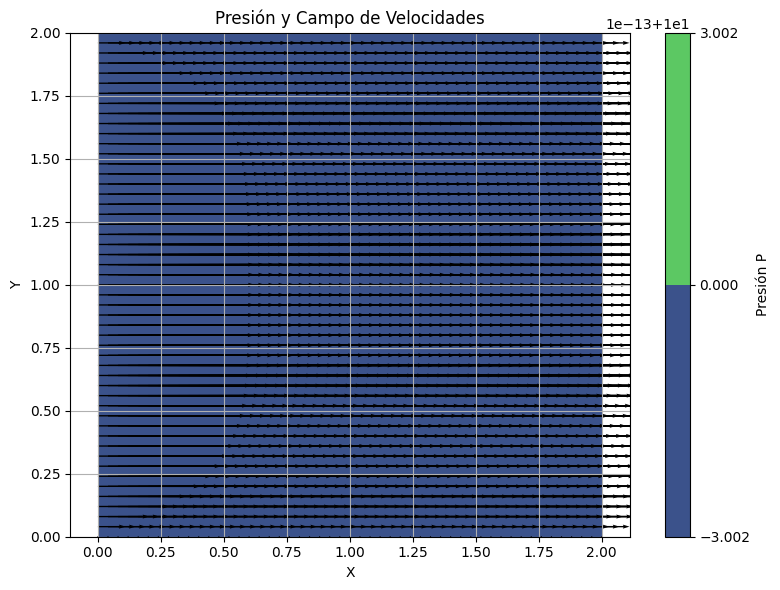

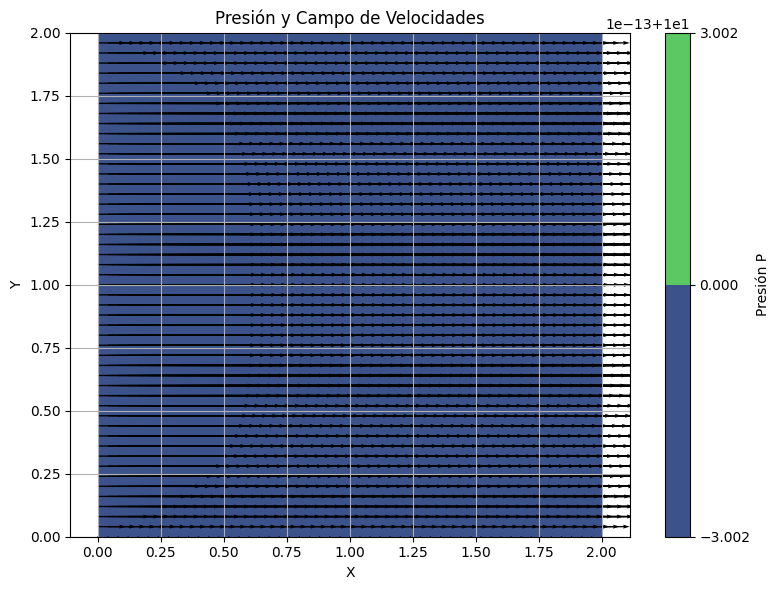

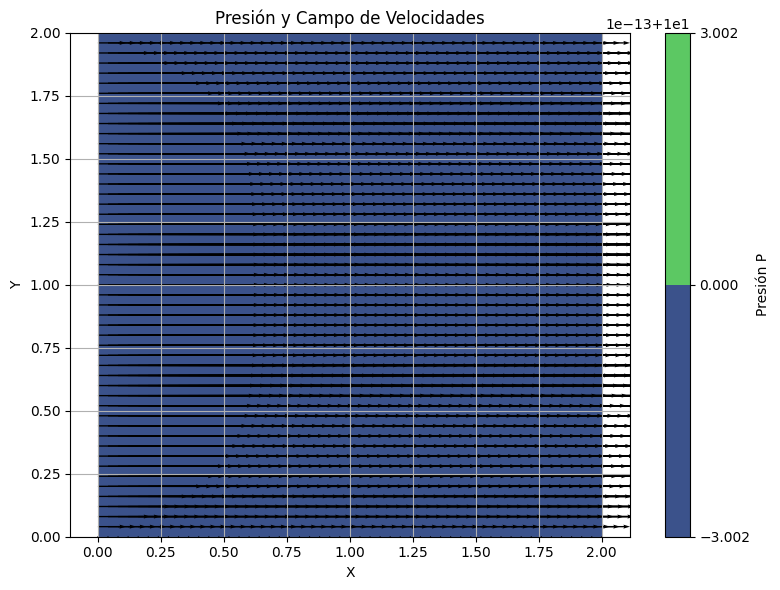

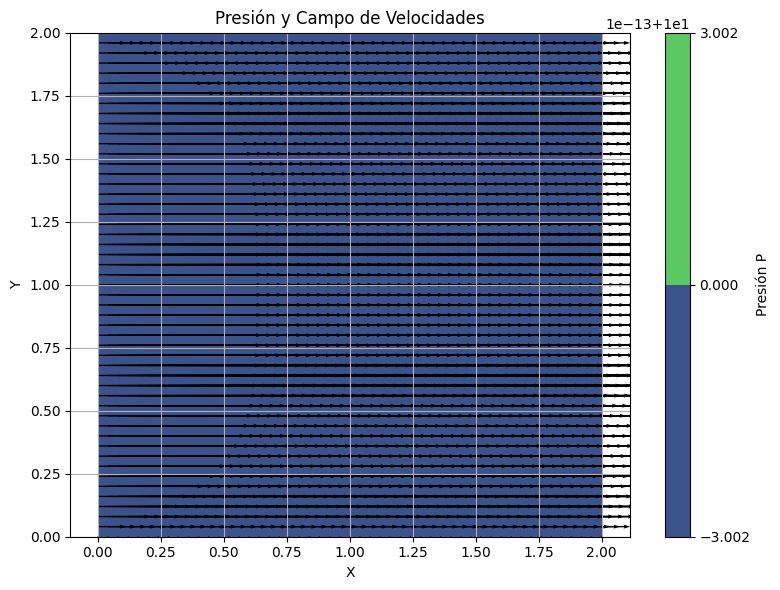

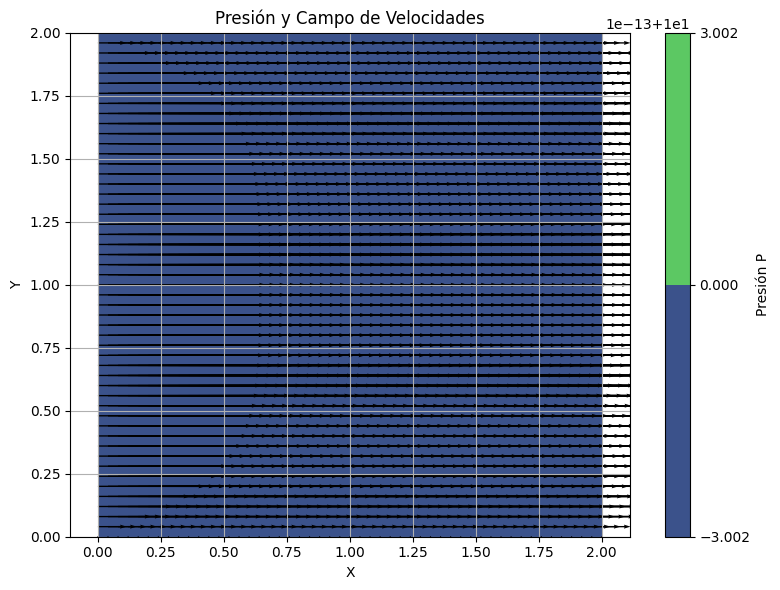

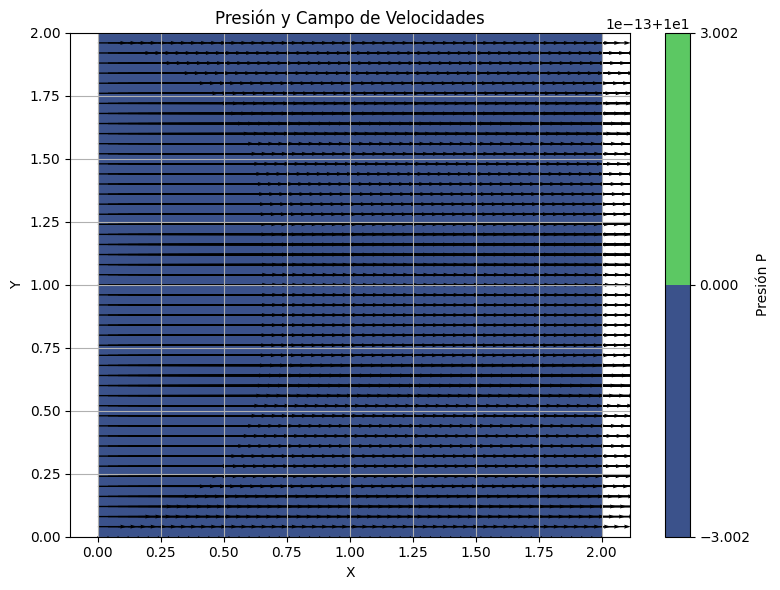

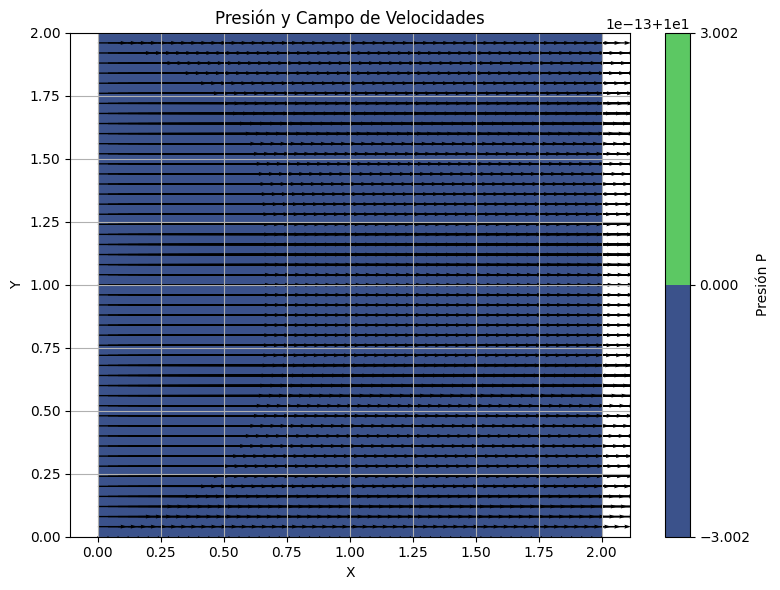

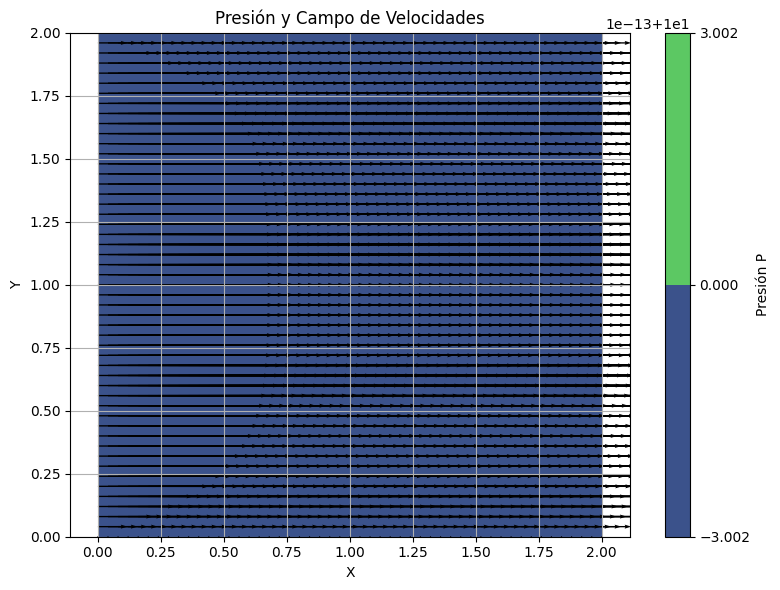

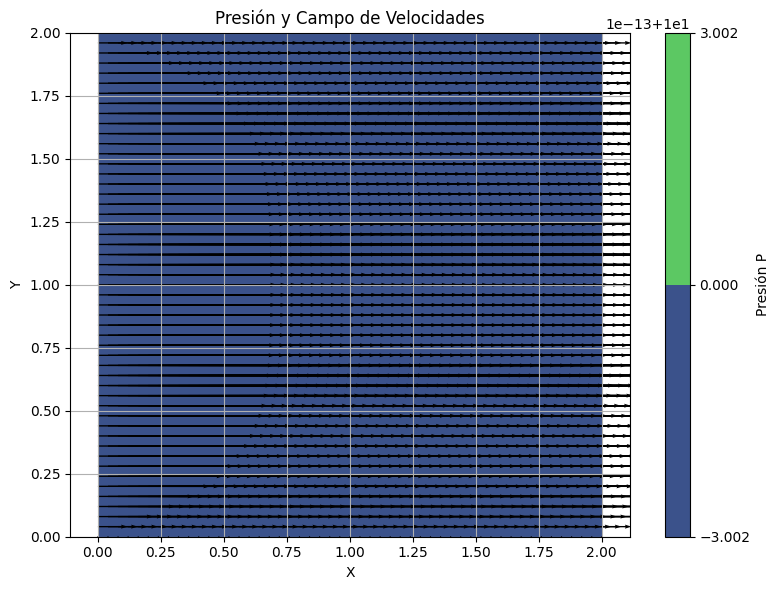

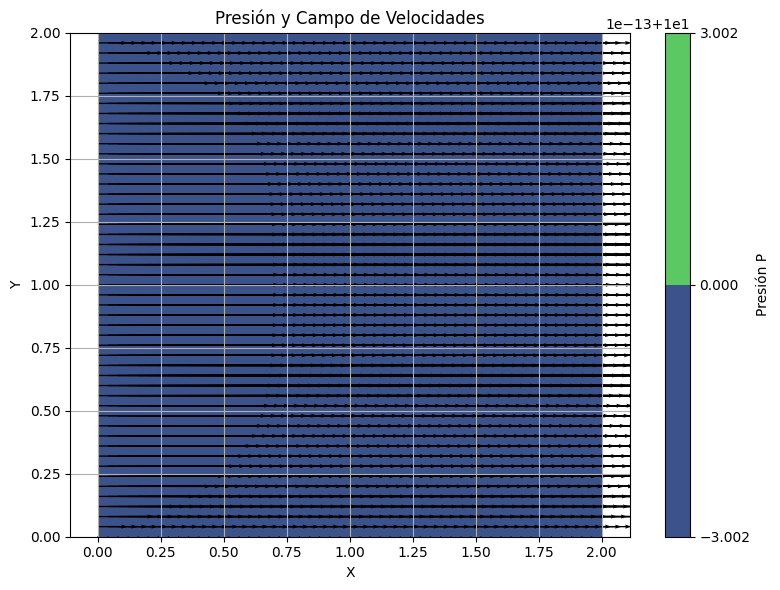

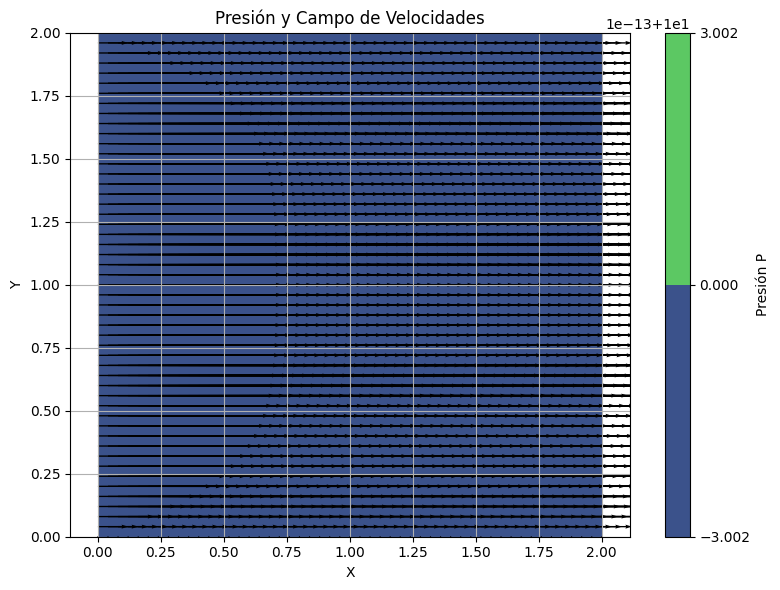

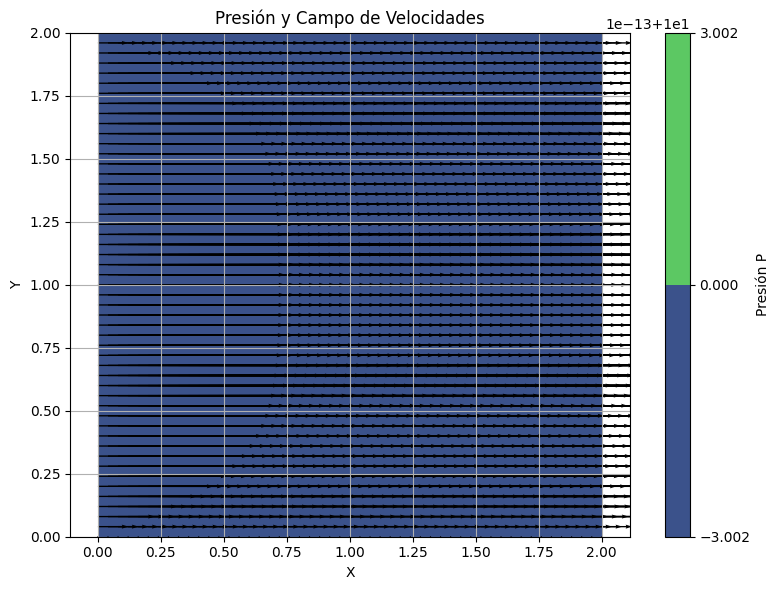

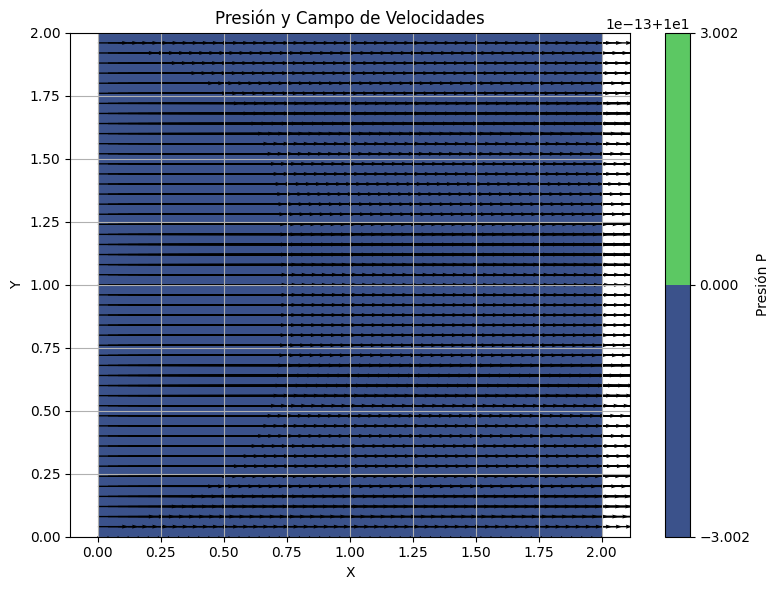

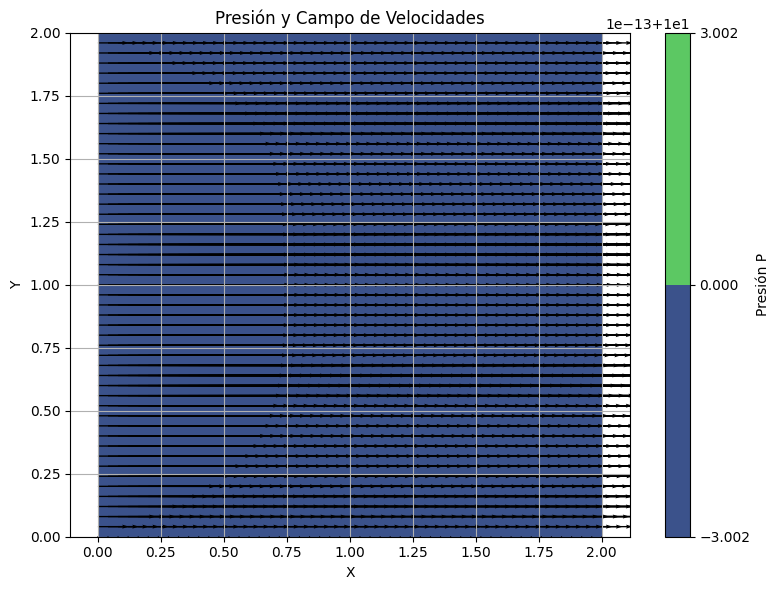

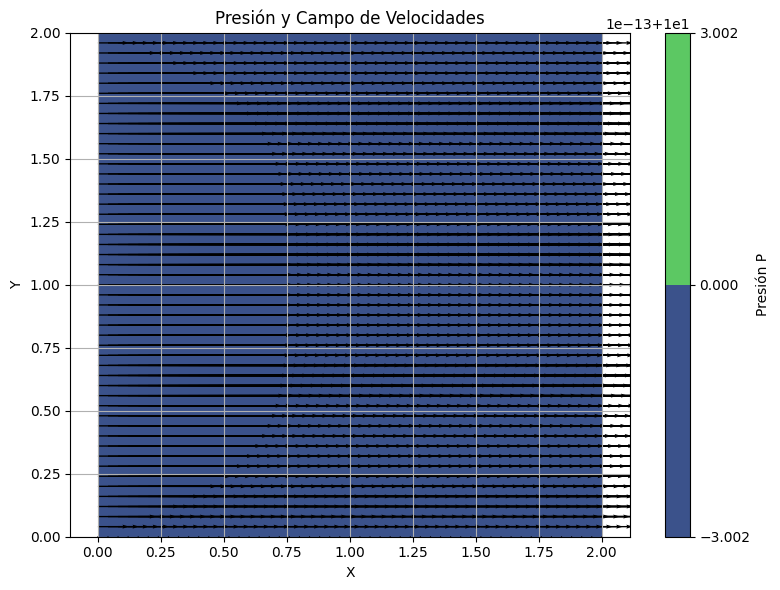

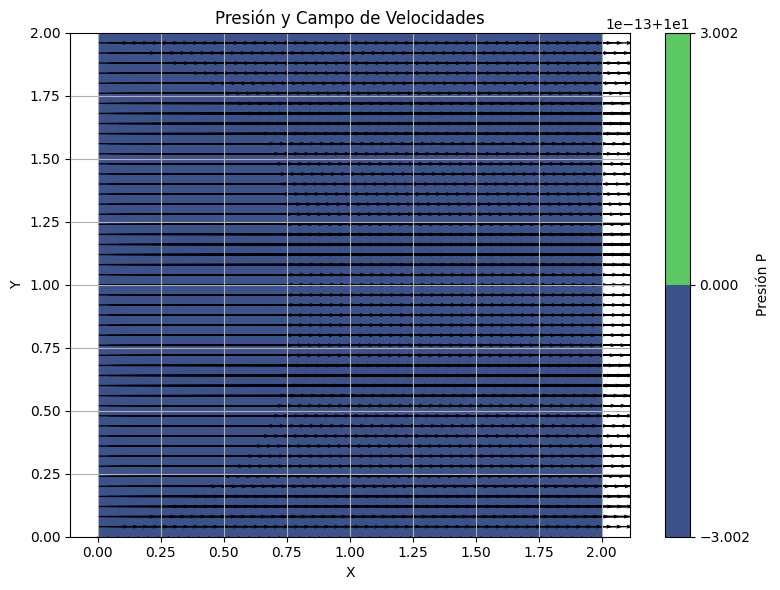

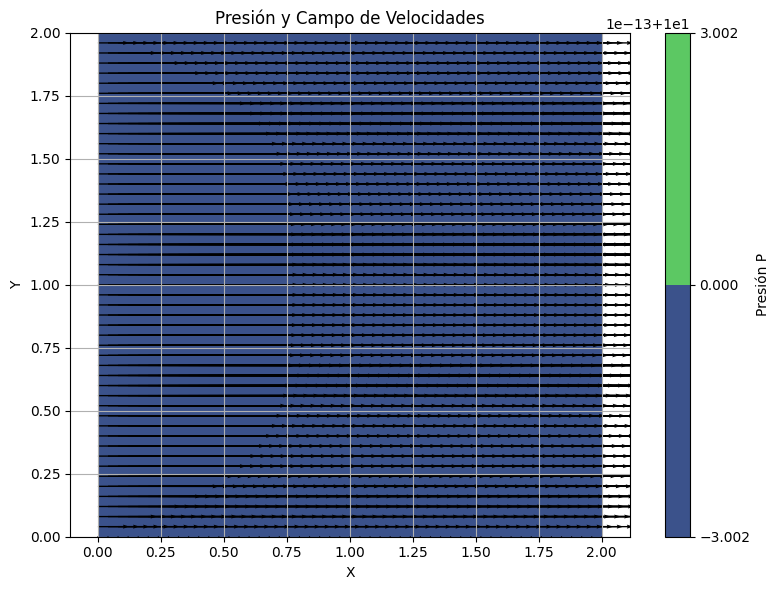

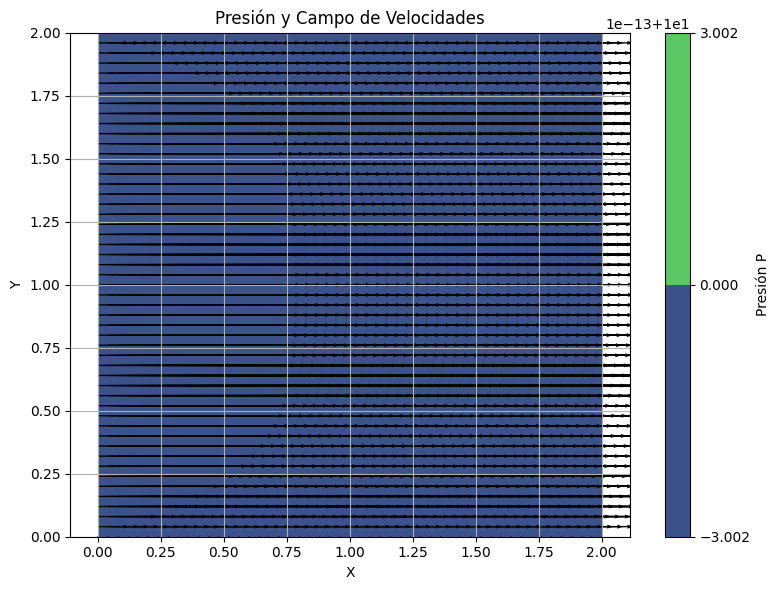

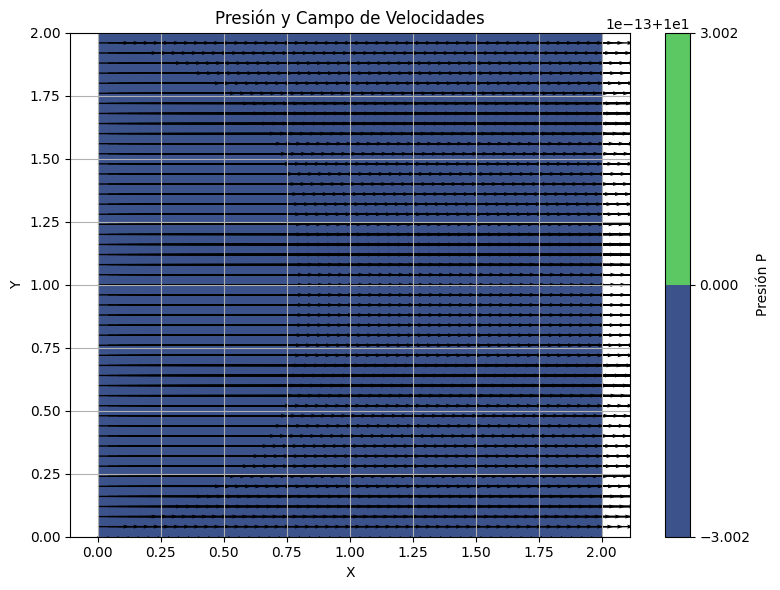

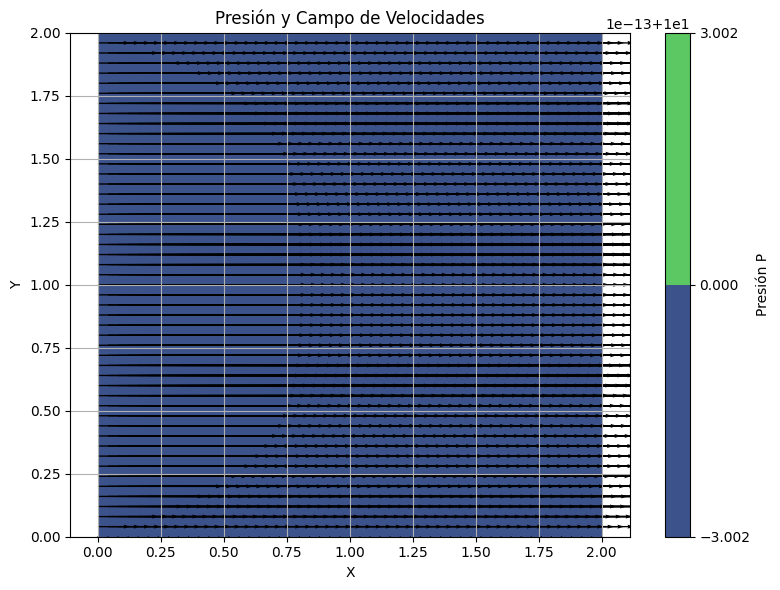

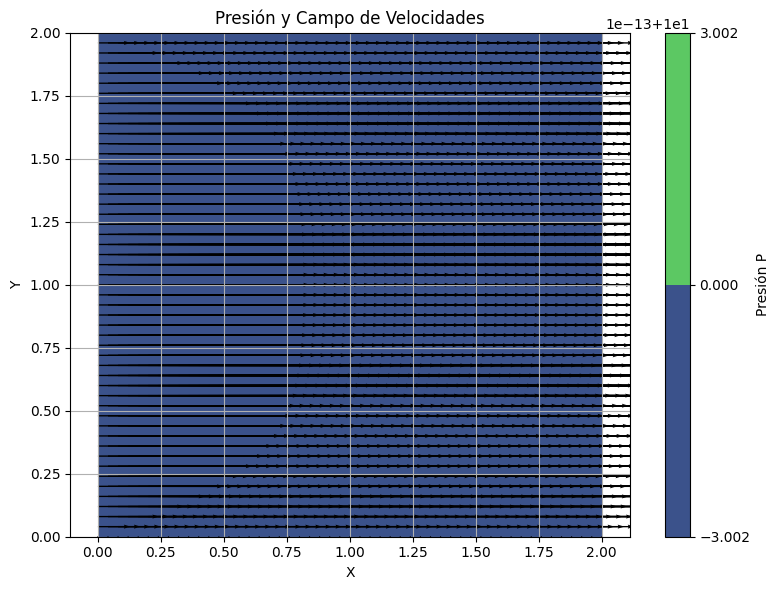

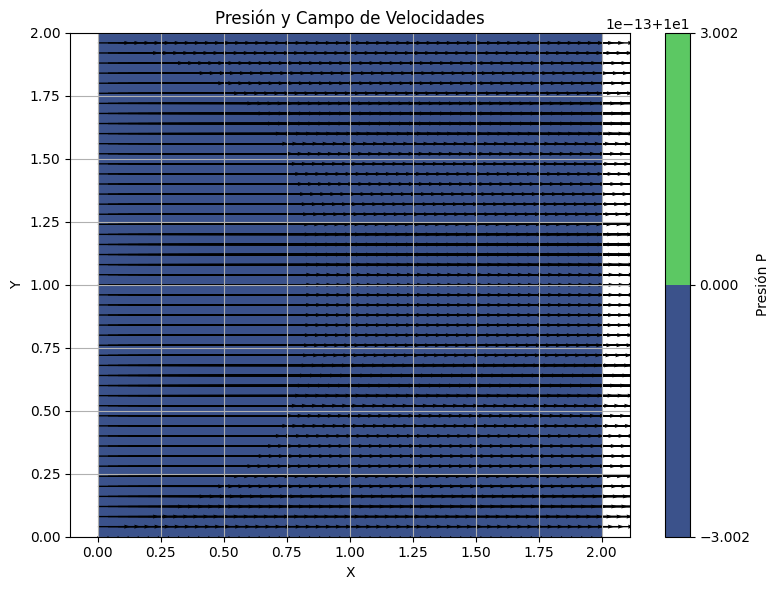

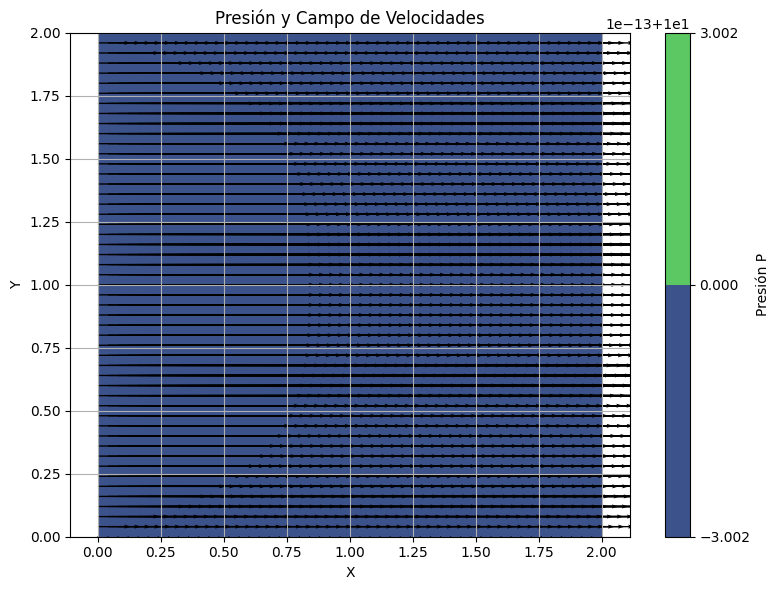

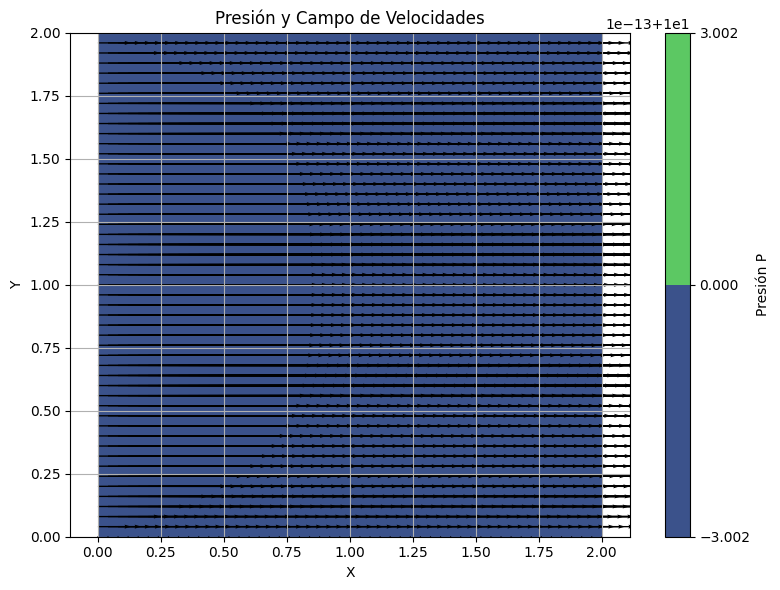

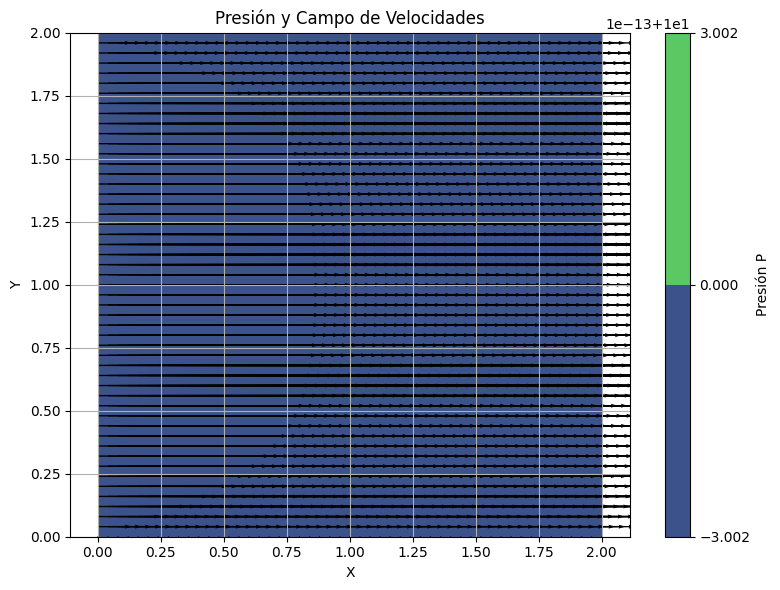

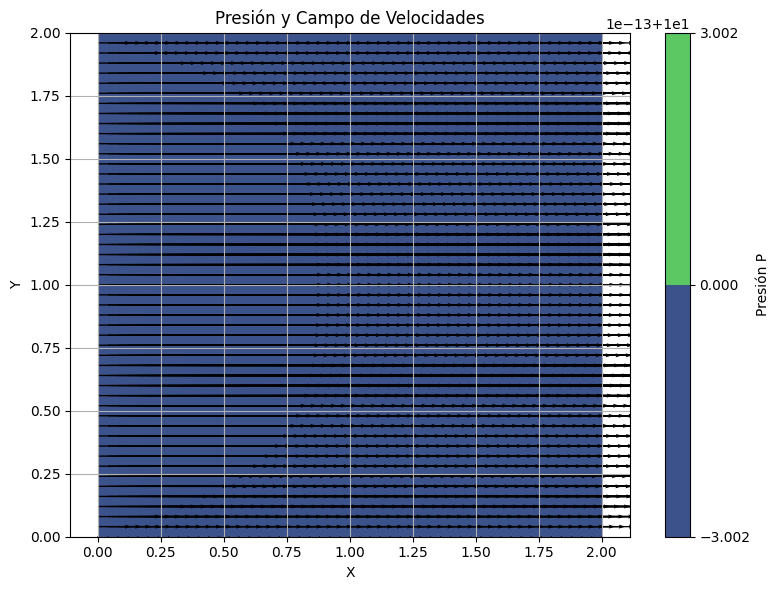

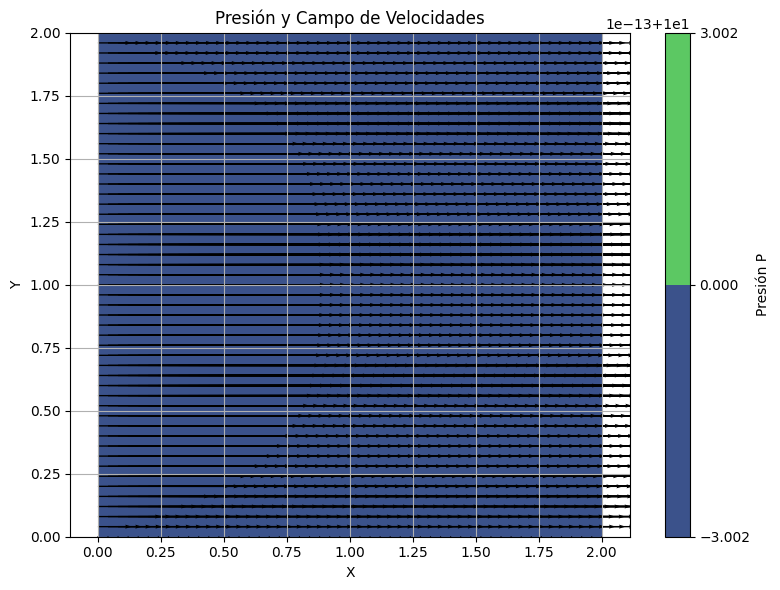

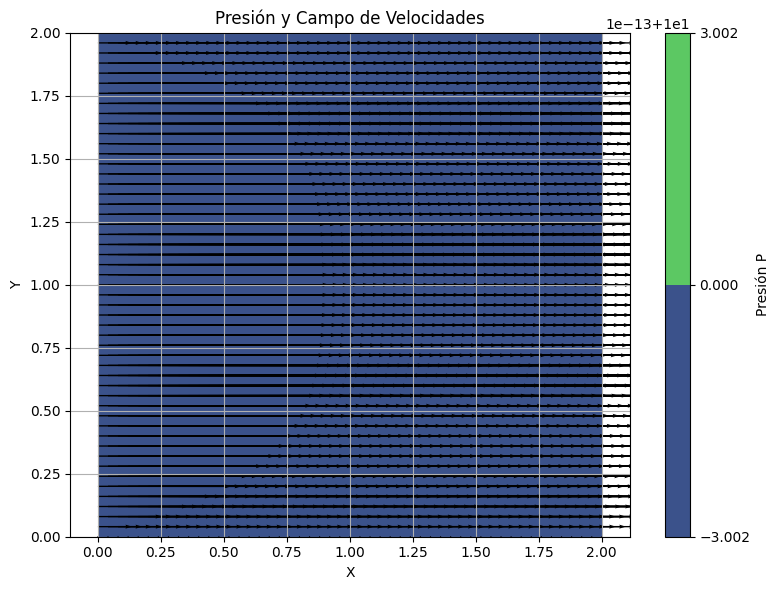

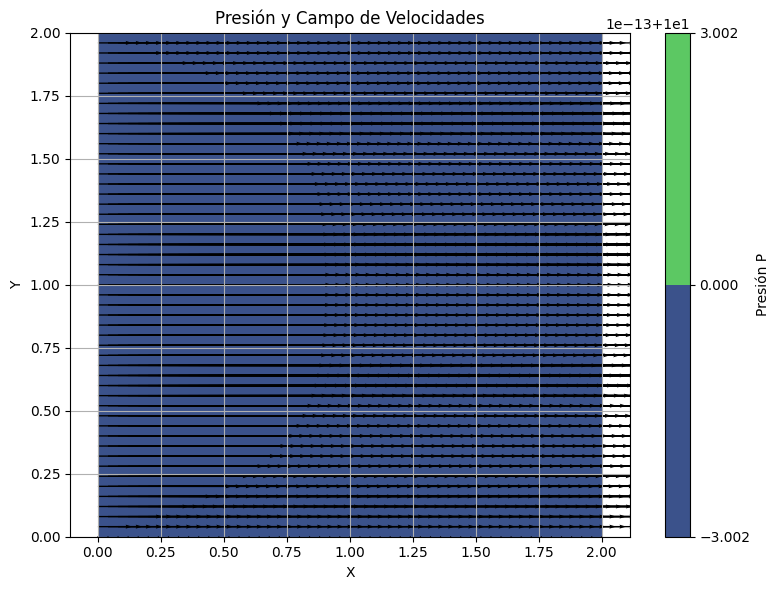

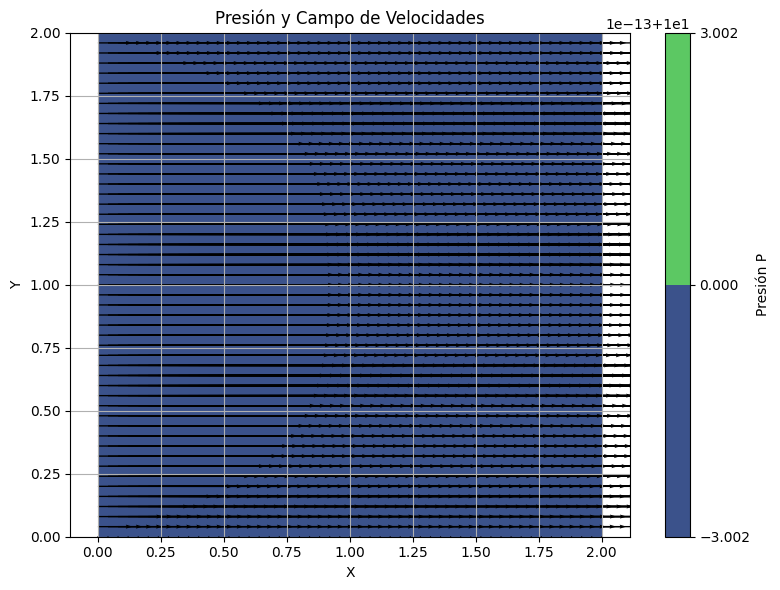

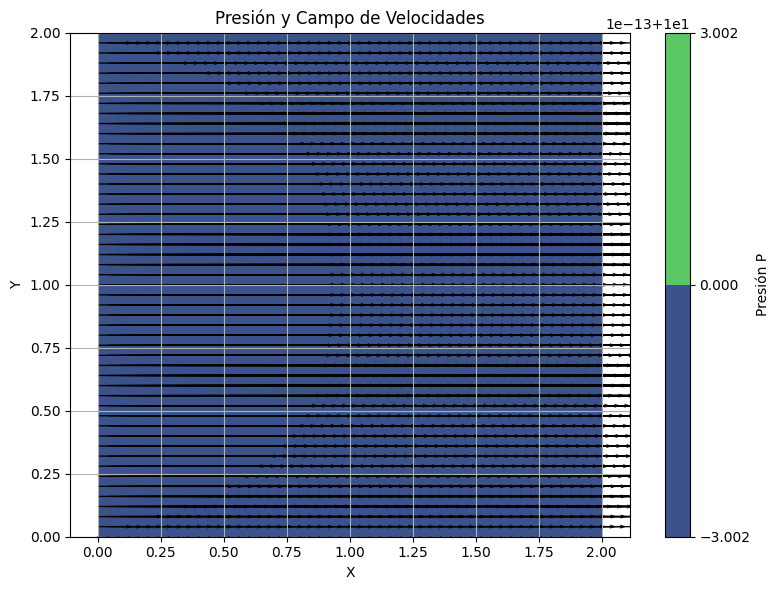

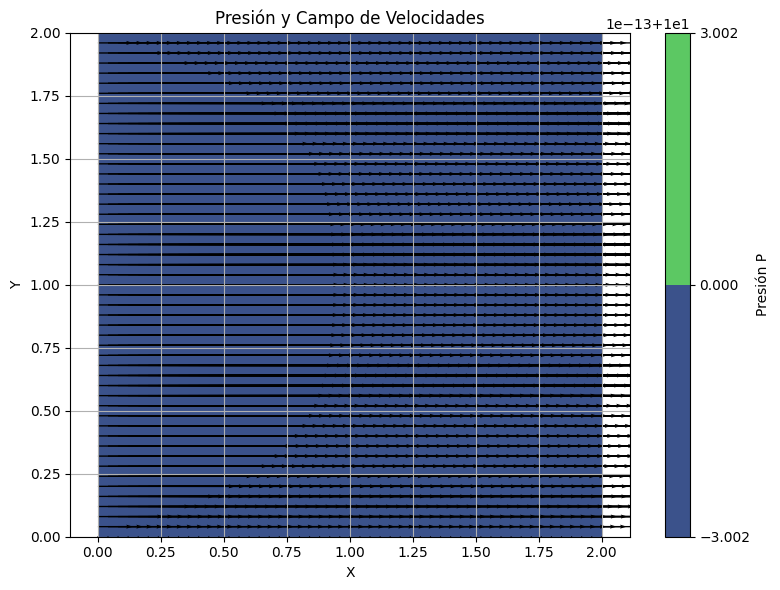

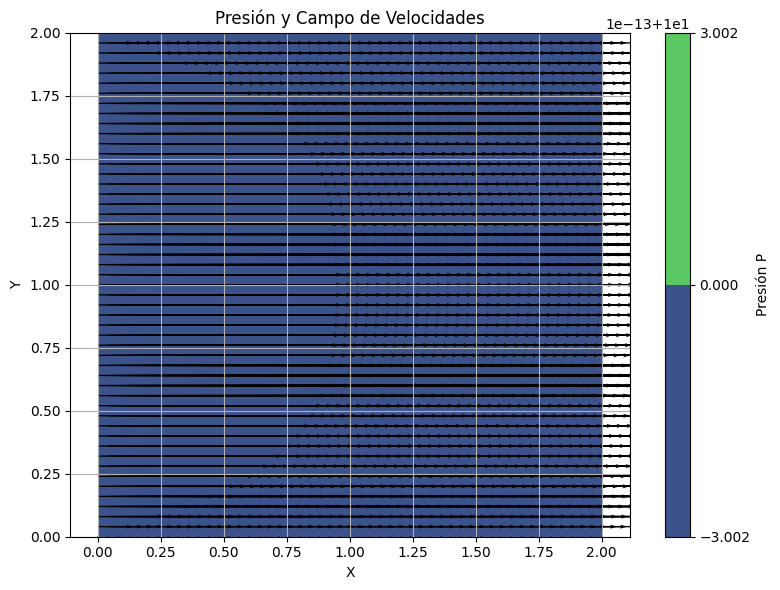

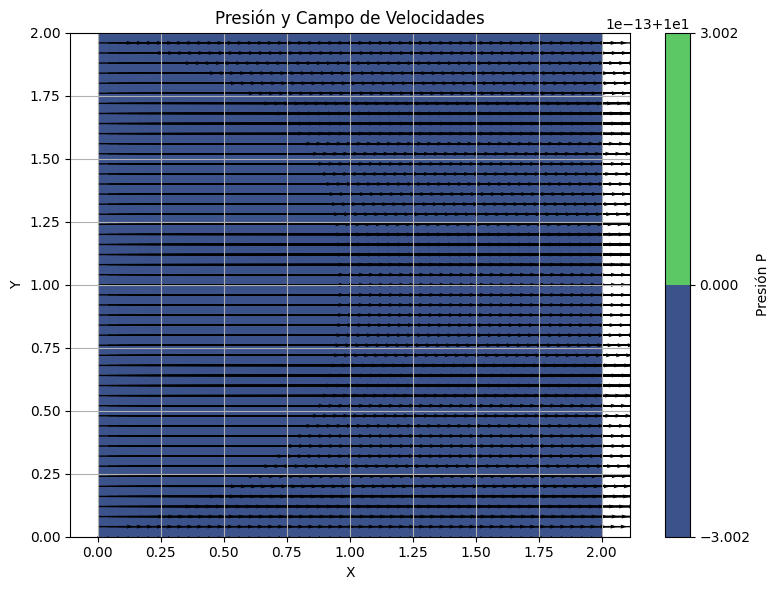

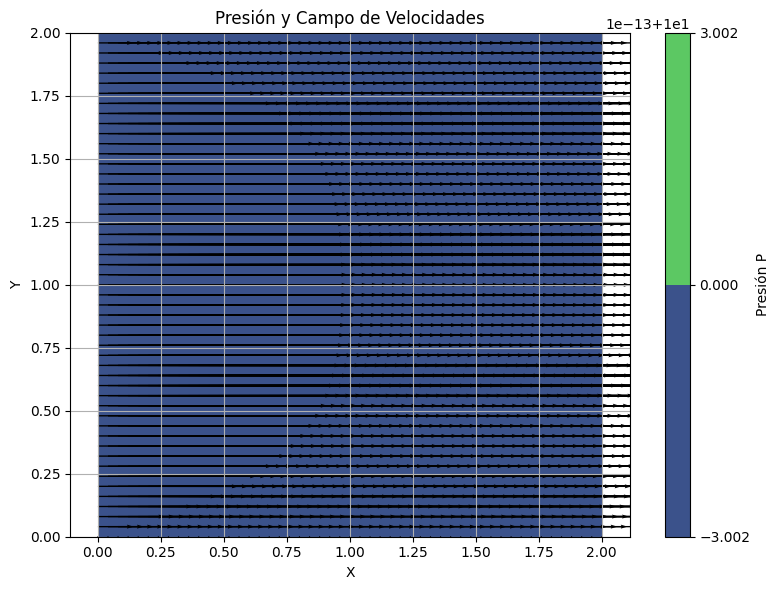

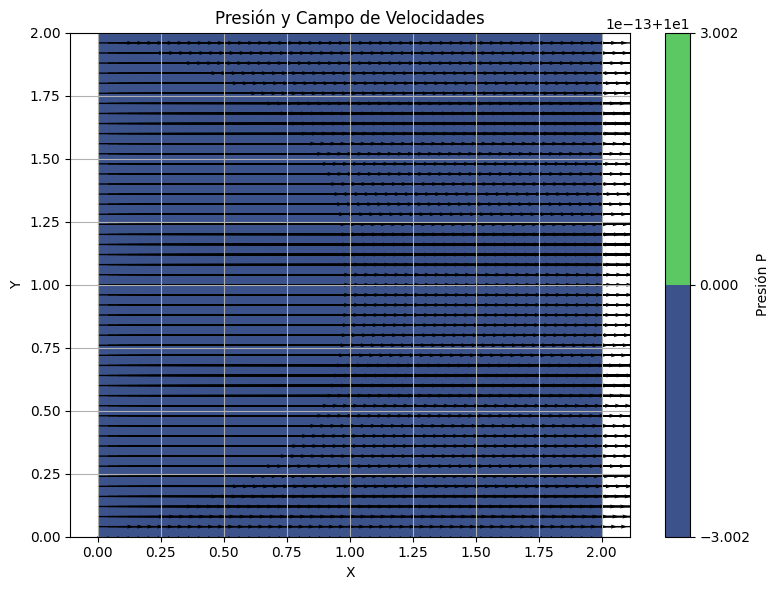

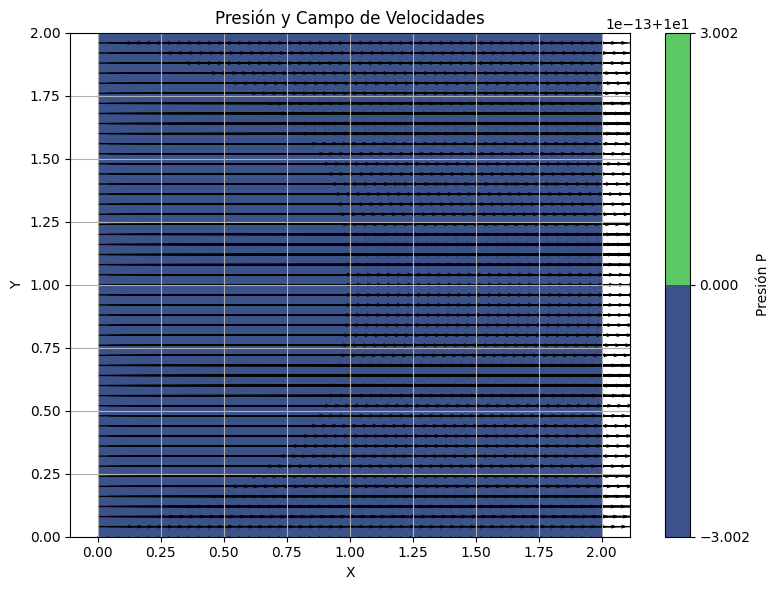

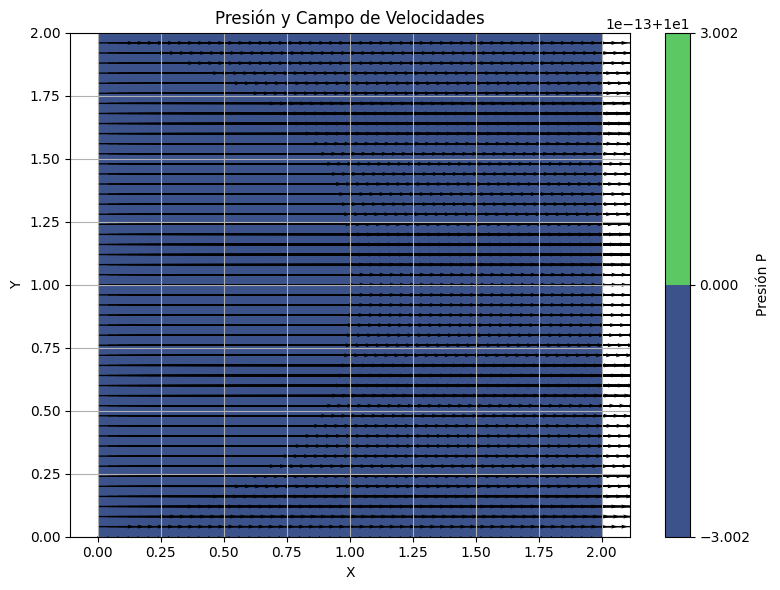

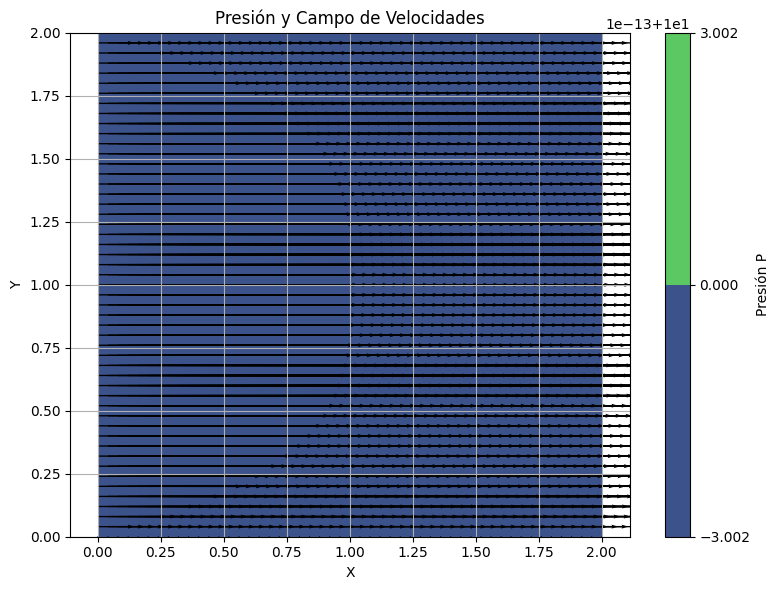

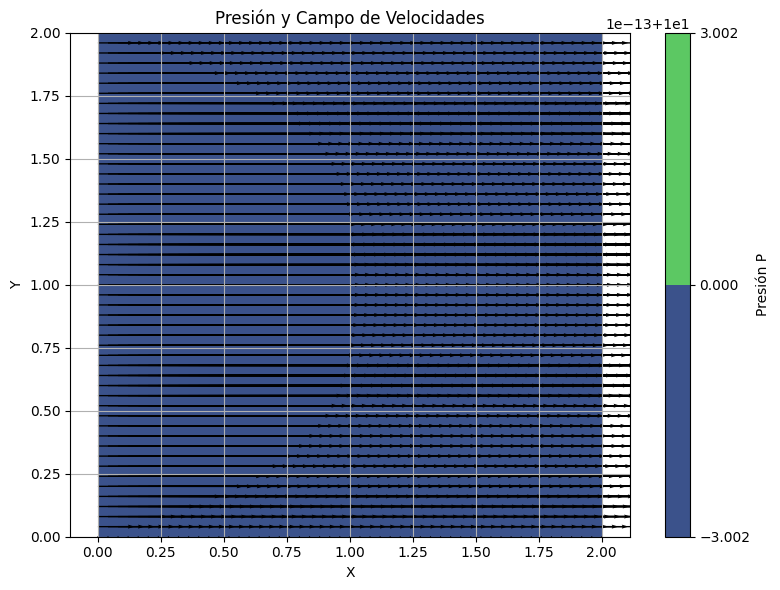

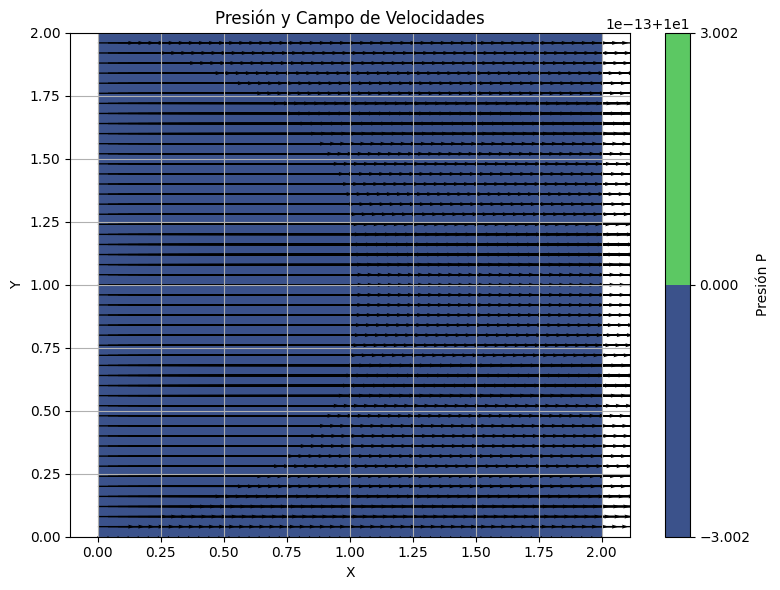

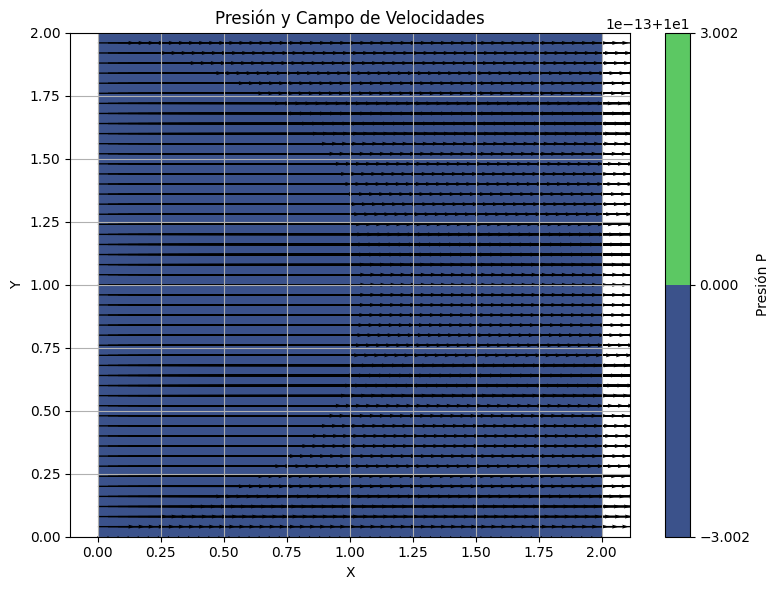

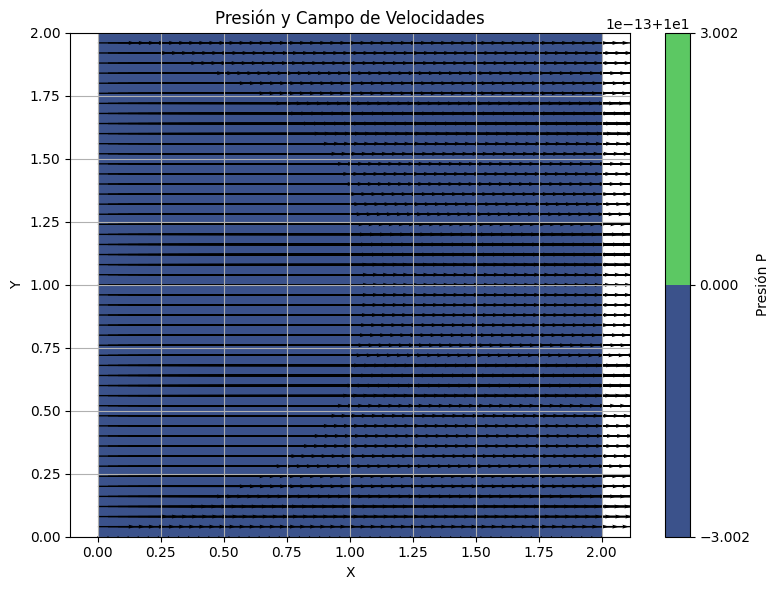

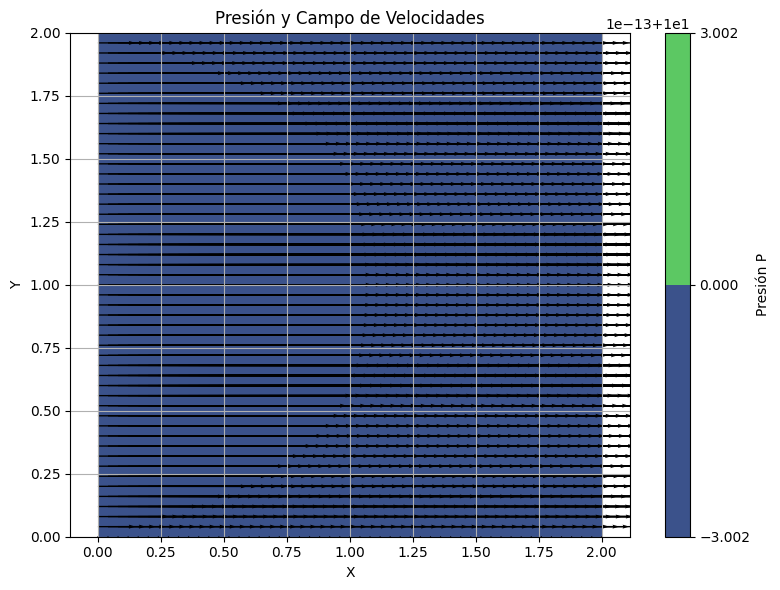

In [29]:
file_names = [f"campos_{i:03}.txt" for i in range(510, 1000, 10)]
for f in file_names:
    graph(f)

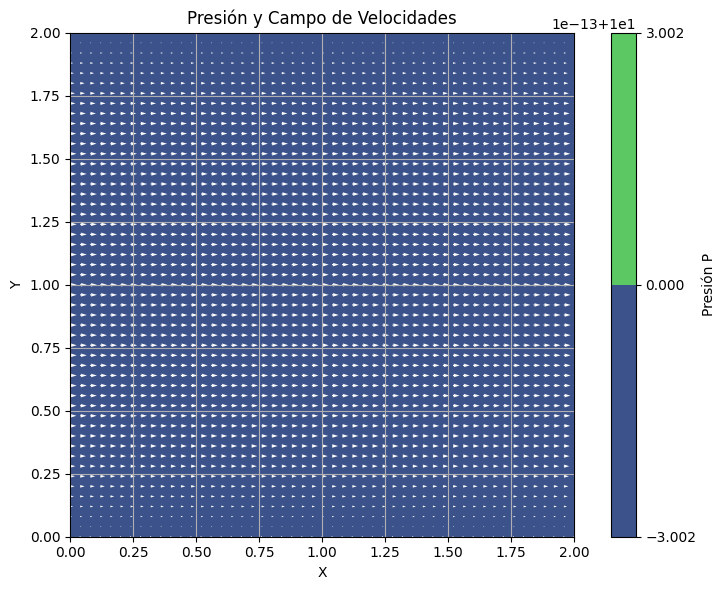

In [35]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Ruta base de los archivos
data_dir = "data"

# Generar la lista de nombres en orden
file_names = [f"campos_{i:03}.txt" for i in range(510, 2000, 10)]
file_paths = [os.path.join(data_dir, name) for name in file_names]

# Cargar la primera para extraer la grilla
data = np.loadtxt(file_paths[0], skiprows=3)
X = data[:, 2]
Y = data[:, 3]
nx = len(np.unique(X))
ny = len(np.unique(Y))
X_grid = X.reshape(ny, nx)
Y_grid = Y.reshape(ny, nx)

# Crear figura
fig, ax = plt.subplots(figsize=(8, 6))

# Inicializar con la primera imagen
U = data[:, 4].reshape(ny, nx)
V = data[:, 5].reshape(ny, nx)
P = data[:, 6].reshape(ny, nx)

contourf = ax.contourf(X_grid, Y_grid, P, cmap='viridis')
quiver = ax.quiver(X_grid, Y_grid, U, V, color='white', scale=None, scale_units='xy')


# Barra de colores fija
cbar = fig.colorbar(contourf, ax=ax)
cbar.set_label("Presión P")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Presión y Campo de Velocidades')
ax.set_aspect('equal')
ax.grid(True)

# Función de actualización
def update(frame_index):
    data = np.loadtxt(file_paths[frame_index], skiprows=3)
    U = data[:, 4].reshape(ny, nx)
    V = data[:, 5].reshape(ny, nx)
    P = data[:, 6].reshape(ny, nx)

    # Actualizar contornos
    for coll in contourf.collections:
        coll.remove()
    new_contourf = ax.contourf(X_grid, Y_grid, P, cmap='viridis')

    # Actualizar vectores
    quiver.set_UVC(U, V)

    ax.set_title(f'Presión y Campo de Velocidades (frame {frame_index})')

    return new_contourf.collections + [quiver]

# Crear animación
ani = animation.FuncAnimation(
    fig, update, frames=len(file_paths), blit=False, interval=200
)

plt.tight_layout()
plt.show()
